In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
car_df = pd.read_csv('cars.csv')

In [3]:
brand_df = pd.read_csv('brand.csv')

In [4]:
car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
car_df.shape

(3687, 13)

In [6]:
brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


In [7]:
brand_df.shape

(48, 2)

### 주 데이터는 cars.csv이며, 보조자료로 brand.csv도 준비되어있으니 함께 활용해보세요.
### 이번 프로젝트에서는 "중고차 가격 예측 모델"을 가정하여 데이터를 준비해볼 수도 있고, "중고차 특성에 따른 클러스터링"을 가정하여 데이터를 준비해볼 수도 있습니다.

* 1. cars.csv와 brand.csv의 데이터 합치기
* [힌트] cars.csv의 title 변수로부터 브랜드 데이터를 추출할 수 있습니다.

In [8]:
df_merge = pd.merge(car_df, brand_df, on='title',how='outer') 
df_merge1 = df_merge.copy()
df_merge.describe()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
count,3687.000000,3.687000e+03,3687.000000,2276.000000,3662.000000,3652.000000
mean,5787.301058,8.132854e+04,2011.846216,2.807557,4.321409,4.900329
std,4480.629885,3.941718e+04,5.082387,1.546028,0.986760,0.577046
min,400.000000,1.000000e+00,1953.000000,1.000000,2.000000,2.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,3.000000,5.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,5.000000,5.000000
75%,7995.000000,1.030000e+05,2015.500000,4.000000,5.000000,5.000000
max,33900.000000,1.110100e+06,2025.000000,9.000000,5.000000,7.000000


In [9]:
df_merge.dtypes

title                 object
Price                float64
Mileage(miles)       float64
Registration_Year    float64
Previous Owners      float64
Fuel type             object
Body type             object
Engine                object
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
country               object
dtype: object

(array([1.651e+03, 9.760e+02, 4.650e+02, 3.310e+02, 1.670e+02, 7.700e+01,
        1.000e+01, 7.000e+00, 2.000e+00, 1.000e+00]),
 array([  400.,  3750.,  7100., 10450., 13800., 17150., 20500., 23850.,
        27200., 30550., 33900.]),
 <BarContainer object of 10 artists>)

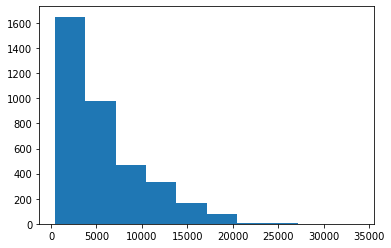

In [10]:
# Price 이상치 있는지 분포 확인
import matplotlib.pyplot as plt
plt.hist(df_merge['Price']) 

* 2. 카테고리형 변수를 숫자 형태로 변환하기
* [힌트] Engine, Emission Class 변수에 주목하세요!

In [11]:
df_merge['Engine'] = df_merge['Engine'].str.replace('L', '')
df_merge['Engine'] = df_merge['Engine'].astype(float)

* 3. 결측치 처리하기
* [힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

In [12]:
# 결측치 변수 비중이 0.9이 넘는 'country' 데이터는 삭제
df_merge = df_merge.drop('country', axis=1)

# Service history 변수의 결측치는 'Unknown'으로 채우기
df_merge['Service history'] = df_merge['Service history'].fillna('Unknown')

In [13]:
# Price 결측치는 평균으로 채우기
df_merge['Price'] = df_merge['Price'].fillna(df_merge['Price'].mean())

# Mileage(miles) 결측치는 평균으로 채우기
df_merge['Mileage(miles)'] = df_merge['Mileage(miles)'].fillna(df_merge['Mileage(miles)'].mean())

# Registration_Year 결측치 평균으로 채우기
df_merge['Registration_Year'] = df_merge['Registration_Year'].fillna(df_merge['Registration_Year'].mean())

# Previous Owners 결측치는 평균으로 채우기
df_merge['Previous Owners'] = df_merge['Previous Owners'].fillna(df_merge['Previous Owners'].mean())

# Engine 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Engine'] = df_merge['Engine'].fillna(df_merge['Engine'].mode()[0])

# Fuel type 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Fuel type'] = df_merge['Fuel type'].fillna(df_merge['Fuel type'].mode()[0])

# Body type 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Body type'] = df_merge['Body type'].fillna(df_merge['Body type'].mode()[0])

# Gearbox 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Gearbox'] = df_merge['Gearbox'].fillna(df_merge['Gearbox'].mode()[0])

# Doors 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Doors'] = df_merge['Doors'].fillna(df_merge['Doors'].mode()[0])

# Seats 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Seats'] = df_merge['Seats'].fillna(df_merge['Seats'].mode()[0])

# Emission Class 결측치는 최빈값으로 채우기(범주형 변수라서)
df_merge['Emission Class'] = df_merge['Emission Class'].fillna(df_merge['Emission Class'].mode()[0])

In [14]:
df_merge.isnull().sum()

title                0
Price                0
Mileage(miles)       0
Registration_Year    0
Previous Owners      0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
dtype: int64

* 4. Scaler 활용해보기

In [15]:
# 데이터 타입 확인
df_merge.dtypes

title                 object
Price                float64
Mileage(miles)       float64
Registration_Year    float64
Previous Owners      float64
Fuel type             object
Body type             object
Engine               float64
Gearbox               object
Doors                float64
Seats                float64
Emission Class        object
Service history       object
dtype: object

In [16]:
# 'title'은 불필요한 정보이므로 삭제
df_merge = df_merge.drop(columns=['title']) 

# 각 범주형 변수 'Fuel type', 'Body type', 'Gearbox', 'Emission Class', 'Service history'는 더미변수로 만들기
df_merge_dummies = pd.get_dummies(df_merge, columns=['Fuel type', 'Body type', 'Gearbox', 'Emission Class', 'Service history'])

In [17]:
print(df_merge_dummies)

            Price  Mileage(miles)  Registration_Year  Previous Owners  Engine  \
0     6900.000000    70189.000000        2016.000000         3.000000     1.4   
1     6900.000000    70189.000000        2016.000000         3.000000     1.4   
2     1990.000000   150000.000000        2007.000000         2.000000     1.9   
3     1995.000000    84000.000000        2008.000000         2.807557     1.4   
4     2495.000000   124138.000000        2011.000000         3.000000     1.2   
...           ...             ...                ...              ...     ...   
3730  5787.301058    81328.536751        2011.846216         2.807557     1.6   
3731  5787.301058    81328.536751        2011.846216         2.807557     1.6   
3732  5787.301058    81328.536751        2011.846216         2.807557     1.6   
3733  5787.301058    81328.536751        2011.846216         2.807557     1.6   
3734  5787.301058    81328.536751        2011.846216         2.807557     1.6   

      Doors  Seats  Fuel ty

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 데이터 표준화
df_x = df_merge_dummies.drop(['Price'], axis=1)
scaler = StandardScaler()
scaled_x = scaler.fit_transform(df_x)

* 5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [19]:
# PCA 적용
pca = PCA(n_components=0.70)
x_pca = pca.fit_transform(df_x)

In [20]:
# 주성분 분석 결과를 데이터프레임으로 변환
df_pca = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(x_pca.shape[1])])

print(df_pca)
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Number of components selected: {pca.n_components_}")

               PC1
0    -11139.536956
1    -11139.536956
2     68671.463403
3      2671.463448
4     42809.463232
...            ...
3730     -0.000002
3731     -0.000002
3732     -0.000002
3733     -0.000002
3734     -0.000002

[3735 rows x 1 columns]
Explained Variance Ratio: [0.99999998]
Number of components selected: 1


* add) 1. 국가별 총 브랜드 개수는?

In [21]:
brand = df_merge1.groupby('country')['title'].count()
print(brand)

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     8
United States      5
Name: title, dtype: int64


* add) 2. 상관관계가 높은 변수들이 있는지 확인해보세요.

In [22]:
df_merge1.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000


In [23]:
# 회고
# 배웠던 내용을 바탕으로 실습을 자율적으로 해보니까 생각보다 더 어려웠습니다. 원-핫 인코딩과 주성분 분석 개념이 특히 어려운 것 같습니다.